# Problem Statement:
Predicing Energy Use based on Temperature, Humidity, Precipitation and Wind Speed.

In [139]:
#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
from scipy.stats import skew
import requests
import io
import warnings
warnings.filterwarnings('ignore')

In [141]:
#Importing dataset

In [25]:
df = pd.read_excel("Train Data.xlsx")

# Exploratory Data Analysis

In [26]:
df.head()

,Occupancy,Temperature Max,Temperature Min,Wind Speed km/h,Wind Speed m/s,Rain mm,Humidity %,Month Code,Month,Month.1,Lighting kwh,Ext Lighting kwh,UPS kwh,HVAC - LS kwh,HVAC HS kwh,HVAC -Tot kwh,Total kwh
0,1492,38,23,8,2.222224,0.0,30,4,Apr,2014-04-01,38289,2435,63500,36235,22604,58839,163063
1,1492,36,26,7,1.944446,0.8,44,5,May,2014-05-01,38778,2889,65408,34709,27187,61896,168971
2,1492,35,25,10,2.777780,5.9,53,6,Jun,2014-06-01,36290,2944,64620,34349,28744,63093,166947
3,1492,32,22,12,3.333336,6.6,67,7,Jul,2014-07-01,36827,2923,64551,29009,21183,50192,154493
4,1465,28,21,21,5.833338,2.7,75,8,Aug,2014-08-01,37866,3134,50232,26177,18913,45090,136322


In [27]:
df.shape # check the data dimension

(12, 17)

In [28]:
df.columns

Index(['Occupancy', 'Temperature Max', 'Temperature Min', 'Wind Speed km/h',
       'Wind Speed m/s', 'Rain mm', 'Humidity %', 'Month Code', 'Month',
       'Month.1', 'Lighting kwh', 'Ext Lighting kwh', 'UPS kwh',
       'HVAC - LS kwh', 'HVAC HS kwh', 'HVAC -Tot kwh', 'Total kwh'],
      dtype='object')

In [29]:
df.drop(columns=['Wind Speed km/h', 'Month', 'Month.1', 'Lighting kwh', 'Ext Lighting kwh', 'UPS kwh','HVAC - LS kwh', 'HVAC HS kwh', 'HVAC -Tot kwh'], axis = 1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Occupancy        12 non-null     int64  
 1   Temperature Max  12 non-null     int64  
 2   Temperature Min  12 non-null     int64  
 3   Wind Speed m/s   12 non-null     float64
 4   Rain mm          12 non-null     float64
 5   Humidity %       12 non-null     int64  
 6   Month Code       12 non-null     int64  
 7   Total kwh        12 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 896.0 bytes


In [31]:
df.columns # check the column names for EDA

Index(['Occupancy', 'Temperature Max', 'Temperature Min', 'Wind Speed m/s',
       'Rain mm', 'Humidity %', 'Month Code', 'Total kwh'],
      dtype='object')

In [32]:
df.describe()

,Occupancy,Temperature Max,Temperature Min,Wind Speed m/s,Rain mm,Humidity %,Month Code,Total kwh
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1295.750000,30.583333,20.250000,3.472225,1.966667,62.416667,6.500000,141829.916667
std,198.303315,3.776924,3.360871,1.210806,2.472883,14.279409,3.605551,18901.263596
min,1066.000000,27.000000,15.000000,1.944446,0.000000,30.000000,1.000000,116911.000000
25%,1129.000000,28.000000,18.000000,2.708336,0.075000,56.750000,3.750000,131080.000000
50%,1309.000000,29.000000,20.000000,3.333336,0.900000,68.500000,6.500000,138822.000000
75%,1492.000000,32.750000,22.250000,3.888892,3.275000,72.500000,9.250000,156635.500000
max,1492.000000,38.000000,26.000000,5.833338,6.600000,77.000000,12.000000,168971.000000


In [33]:
int_cols = df.select_dtypes(exclude=['object']).columns

Occupancy


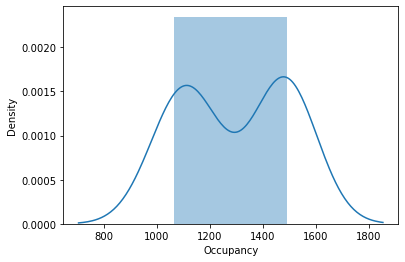

Temperature Max


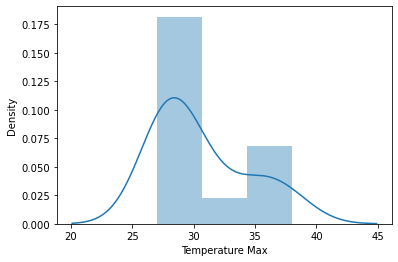

Temperature Min


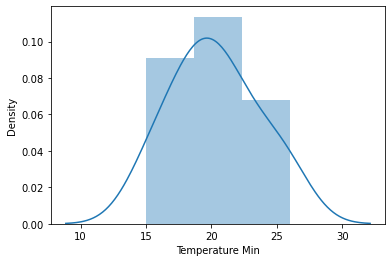

Wind Speed m/s


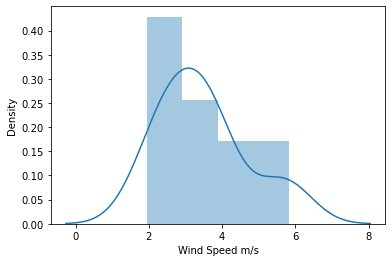

Rain mm


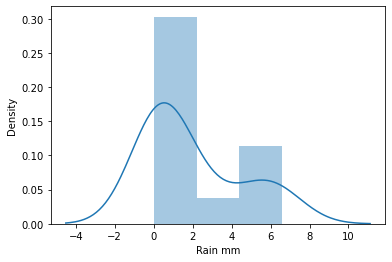

Humidity %


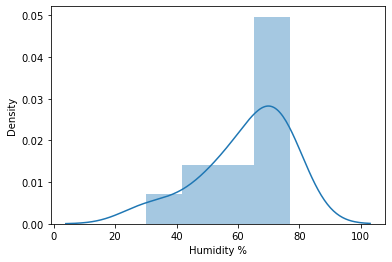

Month Code


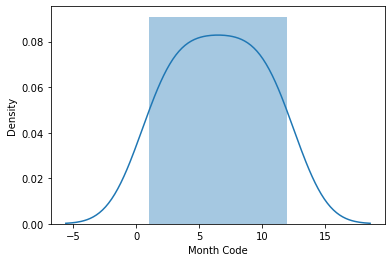

Total kwh


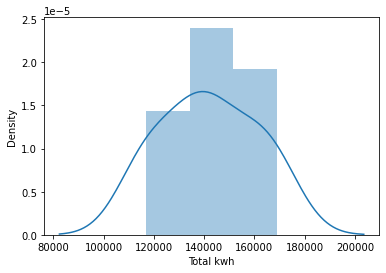

In [34]:
for col in int_cols:
    print(col)
    
    plt.figure()
    sns.distplot(df[col], kde = True)
    plt.show()

## check for outliers

In [35]:
#remove outliers before skewness check and before x, y split

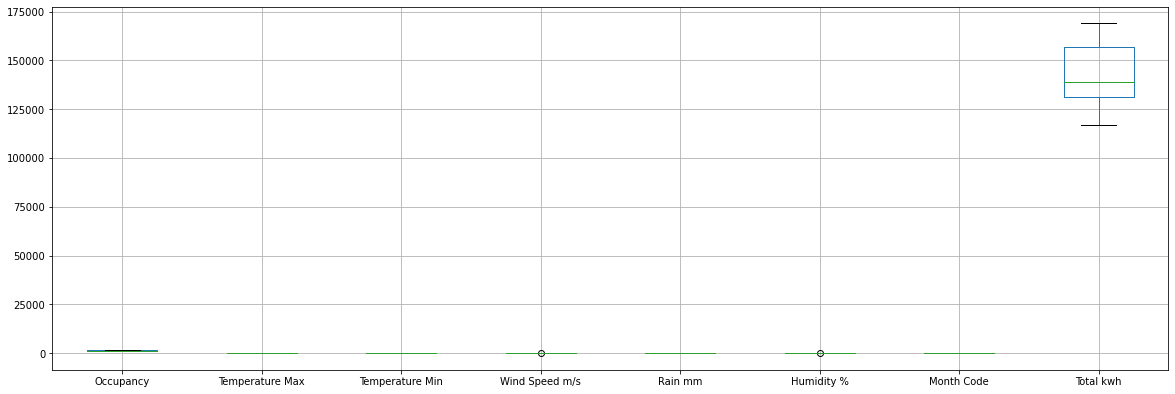

In [36]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [187]:
#Removing outliers by z score

In [37]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [38]:
new_df.shape

(12, 8)

In [39]:
df.shape

(12, 8)

In [40]:
dataloss = ((12-12)/12)*100

In [41]:
dataloss

0.0

No outliers were  detected in the data

## check co-relation

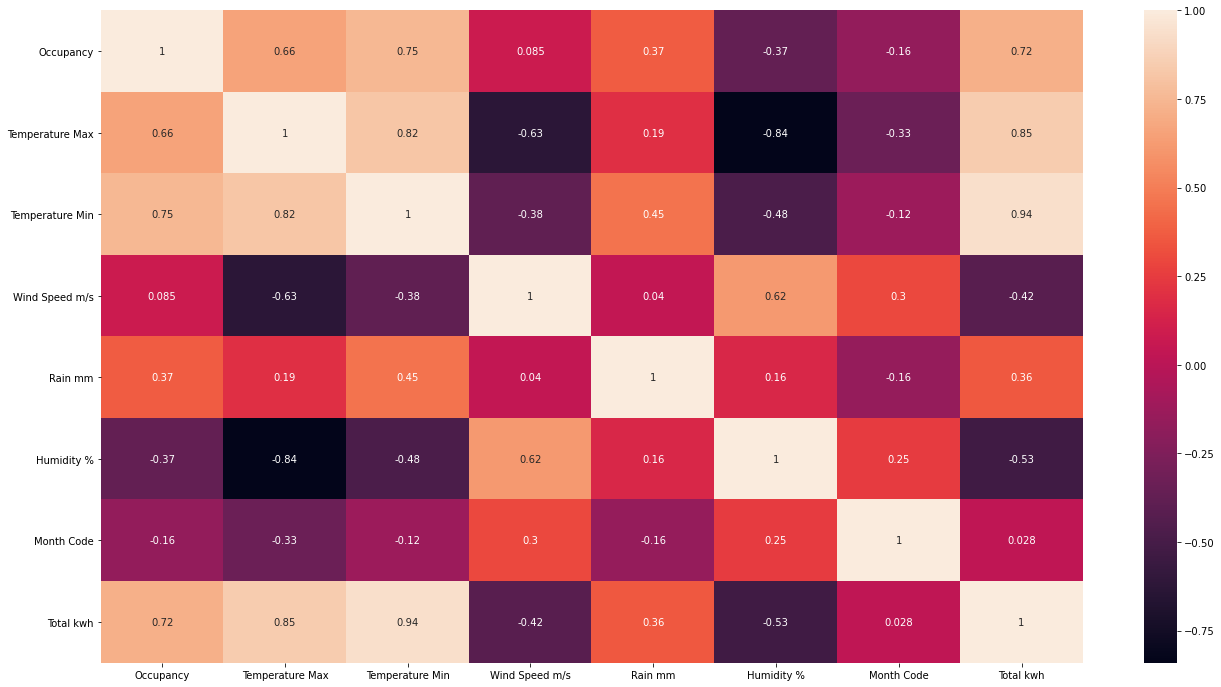

In [42]:
plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [198]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [43]:
cor["Total kwh"].sort_values(ascending=False)

Total kwh          1.000000
Temperature Min    0.936954
Temperature Max    0.847988
Occupancy          0.716358
Rain mm            0.359929
Month Code         0.028035
Wind Speed m/s    -0.416999
Humidity %        -0.529987
Name: Total kwh, dtype: float64

In [44]:
df.columns

Index(['Occupancy', 'Temperature Max', 'Temperature Min', 'Wind Speed m/s',
       'Rain mm', 'Humidity %', 'Month Code', 'Total kwh'],
      dtype='object')

In [45]:
columns = ['Occupancy', 'Temperature Max', 'Temperature Min', 'Wind Speed m/s', 'Rain mm', 'Humidity %', 'Month Code', 'Total kwh']

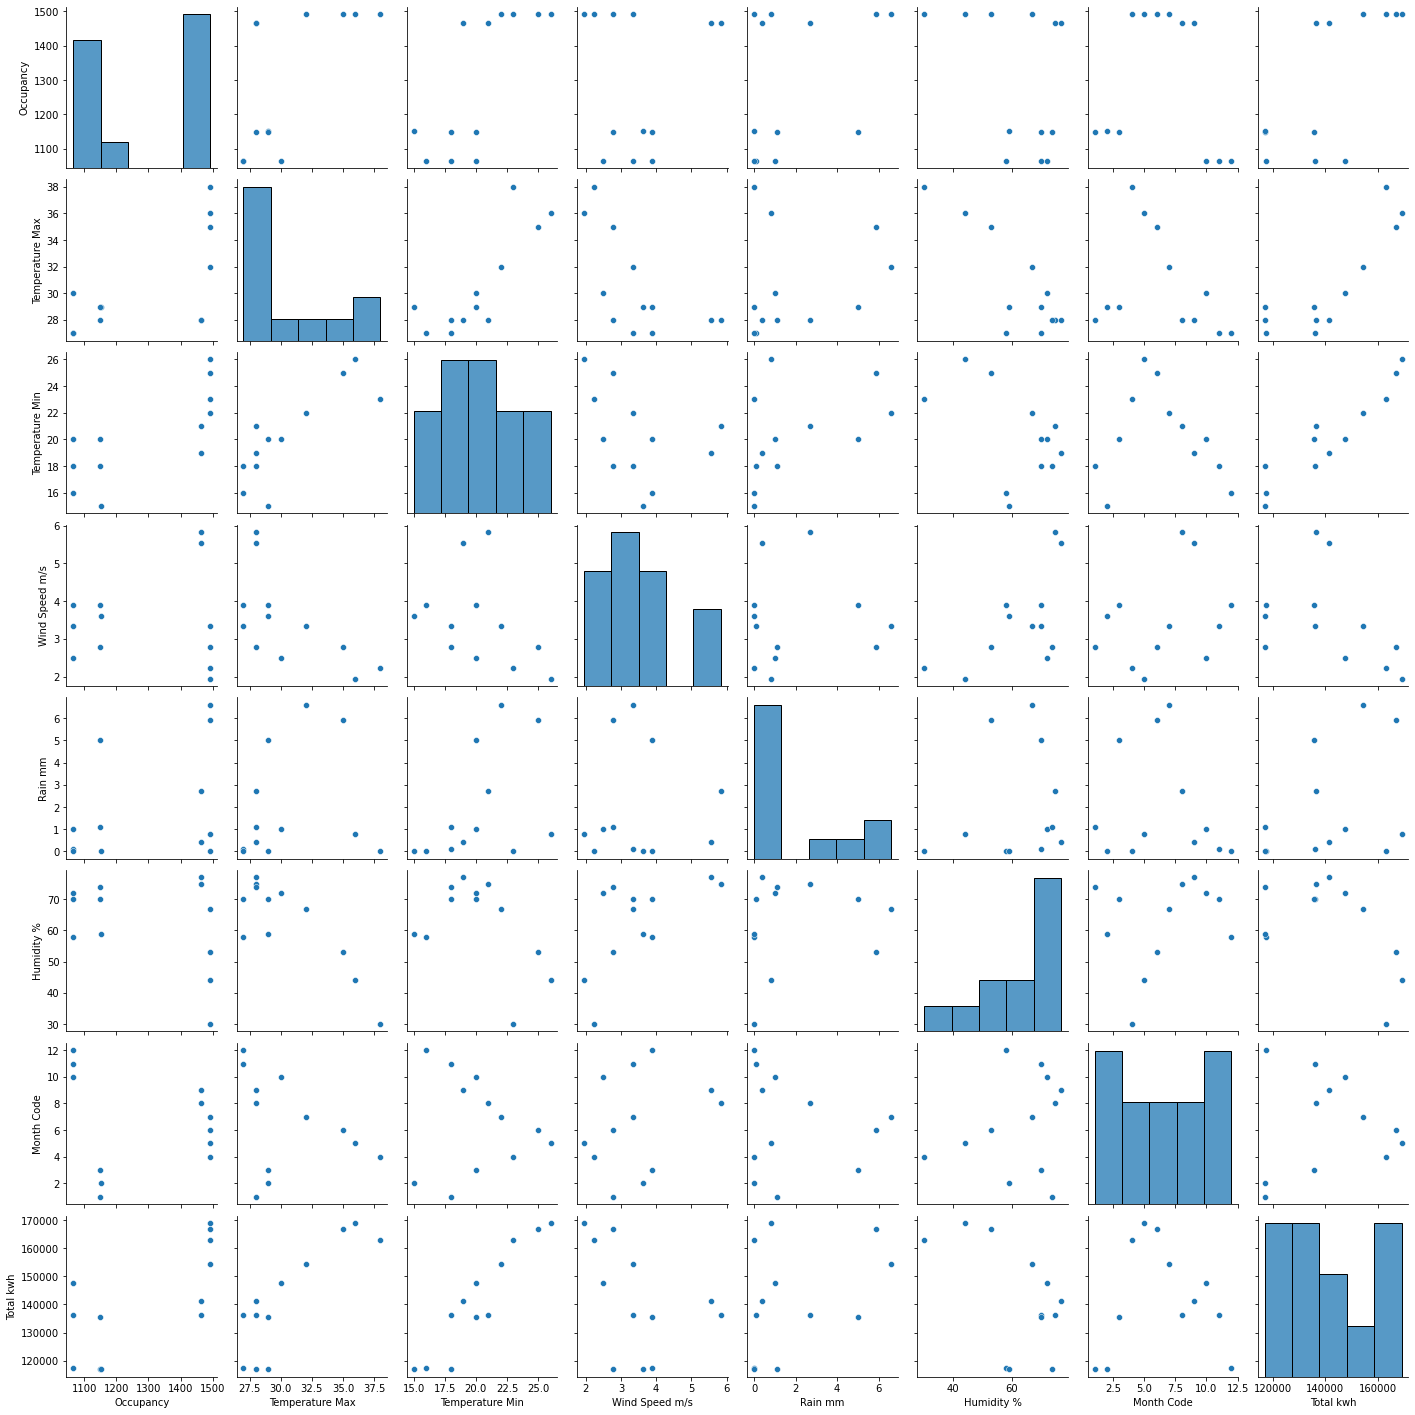

In [46]:
sns.pairplot(df[columns])

## check for skewness

In [47]:
x = df.drop('Total kwh',axis=1)
y = df['Total kwh']

In [48]:
x.skew() # check skewness

Occupancy         -0.077687
Temperature Max    1.020508
Temperature Min    0.223067
Wind Speed m/s     0.936543
Rain mm            1.098791
Humidity %        -1.228026
Month Code         0.000000
dtype: float64

In [49]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [50]:
df_new.skew()

Occupancy         -0.083743
Temperature Max    0.354098
Temperature Min   -0.011104
Wind Speed m/s     0.055323
Rain mm            0.236932
Humidity %        -0.456458
Month Code        -0.193567
dtype: float64

In [51]:
df_new

,Occupancy,Temperature Max,Temperature Min,Wind Speed m/s,Rain mm,Humidity %,Month Code
0,1.031417,1.600806,0.871754,-1.275505,-1.189296,-1.828941,-0.674269
1,1.031417,1.413676,1.681444,-1.755390,-0.101468,-1.416254,-0.368045
2,1.031417,1.292247,1.419581,-0.503882,1.398290,-0.952710,-0.075244
3,1.031417,0.757007,0.584598,0.091735,1.469699,0.179540,0.206535
4,0.893580,-0.712673,0.287696,1.682651,0.835927,1.099859,0.479021
5,0.893580,-0.712673,-0.338638,1.559098,-0.524577,1.365355,0.743507
6,-1.216649,0.176215,-0.019748,-0.862913,0.059468,0.728865,1.000999
7,-1.216649,-1.331298,-0.670007,0.091735,-0.988543,0.499059,1.252294
8,-1.216649,-1.331298,-1.375109,0.567184,-1.189296,-0.611348,1.498041
9,-0.759687,-0.712673,-0.670007,-0.503882,0.130937,0.972616,-1.722104


In [52]:
x

,Occupancy,Temperature Max,Temperature Min,Wind Speed m/s,Rain mm,Humidity %,Month Code
0,1492,38,23,2.222224,0.0,30,4
1,1492,36,26,1.944446,0.8,44,5
2,1492,35,25,2.777780,5.9,53,6
3,1492,32,22,3.333336,6.6,67,7
4,1465,28,21,5.833338,2.7,75,8
5,1465,28,19,5.555560,0.4,77,9
6,1066,30,20,2.500002,1.0,72,10
7,1066,27,18,3.333336,0.1,70,11
8,1066,27,16,3.888892,0.0,58,12
9,1150,28,18,2.777780,1.1,74,1


In [53]:
x = df_new

## finding the best random state

In [54]:
from sklearn.metrics import r2_score

In [55]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    acc = r2_score(y_test, predLR)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," on Random State ",maxRS)

Best accuracy is 0.8636916518966327  on Random State  148


## test train split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=148)

In [57]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, make_scorer
from catboost import CatBoostRegressor
from sklearn import metrics

## regression

In [58]:
def models(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    plt.scatter(y_test,predLR,color='b')
    plt.plot(y_test,y_test, color='r')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.show()
    
    print('Model Name:', model)
    print('MAE:', metrics.mean_absolute_error(y_test, predLR))
    print('MSE:', metrics.mean_squared_error(y_test, predLR))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predLR)))
    print('Variance:', metrics.explained_variance_score(y_test, predLR))
    print('R2 Score:', r2_score(y_test, pred))
    print('------------------------------------------------------------')
    return r2_score(y_test, pred)

In [63]:
model_list = [LinearRegression(), Ridge(), Lasso()]

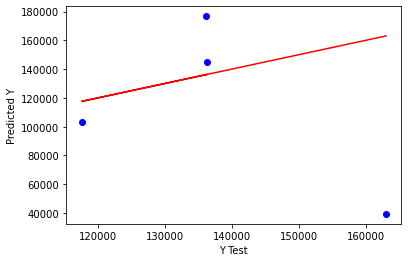

Model Name: LinearRegression()
MAE: 46655.345073751174
MSE: 4302977132.961685
RMSE: 65597.08174120008
Variance: -13.503943238674292
R2 Score: 0.8636916518966327
------------------------------------------------------------


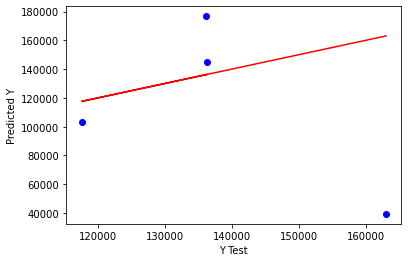

Model Name: Ridge()
MAE: 46655.345073751174
MSE: 4302977132.961685
RMSE: 65597.08174120008
Variance: -13.503943238674292
R2 Score: 0.6262766795411916
------------------------------------------------------------


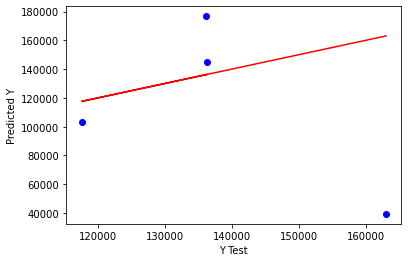

Model Name: Lasso()
MAE: 46655.345073751174
MSE: 4302977132.961685
RMSE: 65597.08174120008
Variance: -13.503943238674292
R2 Score: 0.8654265082252811
------------------------------------------------------------


In [64]:
model_dict = {}
for i in model_list:
    mod_name = str(i)
    if '(' in mod_name:
        mod_name = str(i).split('(')[0]
    else:
        mod_name = str(i).split('.')[0]
    model_dict[mod_name] = models(i)

In [65]:
model_dict

{'LinearRegression': 0.8636916518966327,
 'Ridge': 0.6262766795411916,
 'Lasso': 0.8654265082252811}

## Cross-validation of the model

In [74]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 2
models_score ={}
for i in model_list:
    mod_name = str(i)
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i, x_train, y_train, cv=kfold)
    models_score.update({mod_name : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('Ridge()', 0.9164177763321497),
 ('LinearRegression()', 0.9149394887086573),
 ('Lasso()', 0.22357923017375475)]

In [82]:
#saving the model

In [72]:
final_model = LinearRegression()
final_model.fit(x_train, y_train)

LinearRegression()

In [83]:
import joblib
joblib.dump(final_model, "Model.pkl")

['Model.pkl']

### Importing Test Data

In [84]:
x_test = pd.read_excel("Test Data.xlsx")

In [85]:
x_test.head()

,Occupancy,Temperature Max,Temperature Min,Wind Speed m/s,Rain mm,Humidity %,Month
0,1492,26,20,3.4,130,79,9
1,1492,26,19,2.7,159,75,10
2,1492,25,19,3.0,77,68,11
3,1492,25,19,3.2,27,62,12


In [86]:
#Removing outliers by z score

In [87]:
from scipy.stats import zscore
z = np.abs(zscore(x_test))
new_df = x_test[(z<3).all(axis=1)]

In [88]:
new_df.shape

(0, 7)

In [90]:
x_test.shape

(4, 7)

In [91]:
dataloss = ((4-0)/4)*100

In [92]:
dataloss

100.0

In [93]:
#Data loss is high, hence not dropping outliers

## check for skewness

In [94]:
x_test.skew() # check skewness

Occupancy          0.000000
Temperature Max    0.000000
Temperature Min    2.000000
Wind Speed m/s    -0.422521
Rain mm           -0.385508
Humidity %        -0.281313
Month              0.000000
dtype: float64

In [95]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x_test)

df_new = pd.DataFrame(df_new, columns = x_test.columns)

In [96]:
df_new.skew()

Occupancy          0.000000
Temperature Max    0.000000
Temperature Min    0.000000
Wind Speed m/s    -0.160140
Rain mm           -0.514659
Humidity %        -0.161946
Month             -0.052168
dtype: float64

In [97]:
df_new

,Occupancy,Temperature Max,Temperature Min,Wind Speed m/s,Rain mm,Humidity %,Month
0,0.0,1.0,0.0,1.319647,0.643831,1.259275,-1.354225
1,0.0,1.0,0.0,-1.392948,1.169169,0.588874,-0.434199
2,0.0,-1.0,0.0,-0.360552,-0.370292,-0.500030,0.459290
3,0.0,-1.0,0.0,0.433853,-1.442709,-1.348119,1.329134


In [98]:
x_test

,Occupancy,Temperature Max,Temperature Min,Wind Speed m/s,Rain mm,Humidity %,Month
0,1492,26,20,3.4,130,79,9
1,1492,26,19,2.7,159,75,10
2,1492,25,19,3.0,77,68,11
3,1492,25,19,3.2,27,62,12


In [99]:
x_test = df_new

In [101]:
predictions = final_model.predict(x_test)

In [102]:
predictions

array([153629.47156017, 143271.36378839, 131602.96386436, 141452.24675508])

In [104]:
output = pd.read_excel("Test Data.xlsx")
output['Total kwh']=  predictions
output.head()

,Occupancy,Temperature Max,Temperature Min,Wind Speed m/s,Rain mm,Humidity %,Month,Total kwh
0,1492,26,20,3.4,130,79,9,153629.471560
1,1492,26,19,2.7,159,75,10,143271.363788
2,1492,25,19,3.0,77,68,11,131602.963864
3,1492,25,19,3.2,27,62,12,141452.246755


In [105]:
output.to_excel('Prediction.xlsx',index=False)